In [71]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
DATA_FOLDER = '/Users/juliendibiaggio/ADA2024/ada-2024-project-dondata2025/data/raw/'

CHARACTER_METADATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_METADATASET = DATA_FOLDER+"movie.metadata.tsv"
PLOT_SUMMARIES = DATA_FOLDER+"plot_summaries.txt"

In [3]:
character = pd.read_csv(CHARACTER_METADATASET, delimiter='\t')
print("shape:", character.shape)

# Naming the columns of the dataframes
character.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Release_date','Character_name', 'Actor_DOB', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 'Actor_name', 'Actor_age', 'Freebase_character_map', ' Freebase character ID','Freebase actor ID '] 

#creating a header line for the movie_metadata
character.head()

shape: (450668, 13)


,Wikipedia_movie_ID,Freebase_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [4]:
movie_metadata = pd.read_csv(MOVIE_METADATASET, delimiter='\t')
print("shape:", movie_metadata.shape)

# Naming the columns of the dataframes
movie_metadata.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Release_date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'] 

#creating a header line for the movie_metadata
movie_metadata.head()

shape: (81740, 9)


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [5]:
#Merge the two datasets
merged_data = pd.merge(character, movie_metadata, on='Wikipedia_movie_ID')
merged_data_two = pd.merge(character, movie_metadata, on='Wikipedia_movie_ID')

merged_data_two['Countries'] = merged_data_two['Countries'].str.extract(r':\s*\"([^\"]+)\"')
merged_data_two['Languages'] = merged_data_two['Languages'].str.extract(r':\s*\"(\w+)')

merged_data_two.shape

(450652, 21)

In [6]:
# Define a general function to parse JSON-like strings and extract data
def extract_data(data, column_name):
    if pd.notna(data):
        # Check if the entry is already a dictionary
        if isinstance(data, dict):
            data_dict = data
        else:
            try:
                # Try to convert a string representation of a dictionary to a dictionary
                data_dict = json.loads(data.replace("'", '"'))
            except Exception as e:
                return None  # Return None or some error message if conversion fails

        if column_name == 'Languages':
            # Remove the word 'Language' for language column
            return ', '.join(value.replace(" Language", "") for value in data_dict.values())
        elif column_name == 'Countries':
            # Directly join the values for countries
            return ', '.join(data_dict.values())
        elif column_name == 'Genres':
            # Extract genre names without the ID tags
            return ', '.join(genre.split(': ')[-1] for genre in data_dict.values())
        else:
            # Default behavior for other columns
            return ', '.join(data_dict.values())
    return None

In [7]:
#Delete the Revenue column
merged_data = merged_data.drop(columns=['Revenue'])
# Parse the 'Languages' column
merged_data['Countries'] = merged_data['Countries'].apply(lambda x: extract_data(x, 'Countries'))
# Parse the 'Countries' column
merged_data['Languages'] = merged_data['Languages'].apply(lambda x: extract_data(x, 'Languages'))
# Parse the 'Genres' column
merged_data['Genres'] = merged_data['Genres'].apply(lambda x: extract_data(x, 'Genres'))


In [8]:
merged_data.head(20)


,Wikipedia_movie_ID,Freebase_movie_ID_x,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID,Freebase_movie_ID_y,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,2000-02-16,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,3196793,/m/08yl5d,2000-02-16,NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
3,3196793,/m/08yl5d,2000-02-16,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
4,3196793,/m/08yl5d,2000-02-16,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
5,3196793,/m/08yl5d,2000-02-16,John Ramsey,1945-02-12,M,1.85,NaN,Cliff DeYoung,55.0,/m/0lr37f7,/m/0lr3z8x,/m/07jbhb,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
6,3196793,/m/08yl5d,2000-02-16,NaN,1959-05-05,M,NaN,NaN,Gary Dubin,40.0,/m/0lr37f2,NaN,/m/02pnjkh,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
7,3196793,/m/08yl5d,2000-02-16,Patsy Ramsey,1964-07-12,F,1.63,NaN,Judi Evans,35.0,/m/0lr37g2,/m/0lr3z8p,/m/034c1p,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
8,3196793,/m/08yl5d,2000-02-16,JonBenet Ramsey,1994,F,NaN,NaN,Julia Granstrom,6.0,/m/0lr37ds,/m/0lr3z87,/m/08w75d,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
9,3196793,/m/08yl5d,2000-02-16,NaN,1959-10-08,M,NaN,NaN,Brad Greenquist,40.0,/m/0lr37dm,NaN,/m/0k1vd2,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"


In [9]:
#Check if Freebase movie ID x and y are the same
merged_data[merged_data['Freebase_movie_ID_x'] != merged_data['Freebase_movie_ID_y']]

,Wikipedia_movie_ID,Freebase_movie_ID_x,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID,Freebase_movie_ID_y,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres


They are exactly the same, we can drop one of them and rename the other one

In [10]:
merged_data = merged_data.drop(columns=['Freebase_movie_ID_y'])
merged_data = merged_data.rename(columns={'Freebase_movie_ID_x': 'Freebase_movie_ID'})


In [11]:
merged_data.head(20)

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,2000-02-16,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,3196793,/m/08yl5d,2000-02-16,NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
3,3196793,/m/08yl5d,2000-02-16,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
4,3196793,/m/08yl5d,2000-02-16,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
5,3196793,/m/08yl5d,2000-02-16,John Ramsey,1945-02-12,M,1.85,NaN,Cliff DeYoung,55.0,/m/0lr37f7,/m/0lr3z8x,/m/07jbhb,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
6,3196793,/m/08yl5d,2000-02-16,NaN,1959-05-05,M,NaN,NaN,Gary Dubin,40.0,/m/0lr37f2,NaN,/m/02pnjkh,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
7,3196793,/m/08yl5d,2000-02-16,Patsy Ramsey,1964-07-12,F,1.63,NaN,Judi Evans,35.0,/m/0lr37g2,/m/0lr3z8p,/m/034c1p,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
8,3196793,/m/08yl5d,2000-02-16,JonBenet Ramsey,1994,F,NaN,NaN,Julia Granstrom,6.0,/m/0lr37ds,/m/0lr3z87,/m/08w75d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
9,3196793,/m/08yl5d,2000-02-16,NaN,1959-10-08,M,NaN,NaN,Brad Greenquist,40.0,/m/0lr37dm,NaN,/m/0k1vd2,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"


In [12]:
#Check if release date x and y are the same
merged_data[merged_data['Release_date_x'] != merged_data['Release_date_y']]

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres
320,27374355,/m/0by1_ff,NaN,NaN,1953-03-16,F,1.60,NaN,Isabelle Huppert,NaN,/m/0bykcy4,NaN,/m/012g92,Les Indiens sont encore loin,NaN,95.0,,"France, Switzerland",Drama
477,10792038,/m/02qq3mb,NaN,NaN,1950-12-12,M,1.75,/m/0cqgdq,Rajnikanth,NaN,/m/03kxr5d,NaN,/m/02wmbg,Ethe Naasaval,NaN,NaN,Telugu language,India,"Action, Drama"
502,11717027,/m/02rpz18,NaN,NaN,1908-05-30,M,NaN,/m/041rx,Mel Blanc,NaN,/m/052c_g2,NaN,/m/0c5vh,Is There a Doctor in the Mouse?,NaN,NaN,English,United States of America,"Family Film, Comedy"
503,10628777,/m/02qkn7c,NaN,NaN,1964-01-15,F,1.69,NaN,Bhanupriya,NaN,/m/0jmx_q5,NaN,/m/08mdtm,Peddarayudu,NaN,NaN,Telugu language,India,Drama
504,10628777,/m/02qkn7c,NaN,NaN,1972-07-18,F,NaN,NaN,Soundarya,NaN,/m/0jmx290,NaN,/m/02vd_b,Peddarayudu,NaN,NaN,Telugu language,India,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450317,29119097,/m/0dlmtgr,NaN,NaN,NaN,M,NaN,NaN,Biswajit Chakraborty,NaN,/m/0hhz7cc,NaN,/m/0dgsd62,Target: The Final Mission,NaN,NaN,Bengali,,Action
450477,17198681,/m/043mrjw,NaN,NaN,1970-03-23,F,NaN,NaN,Melissa Errico,NaN,/m/0cmxspd,NaN,/m/0269llv,Loose Women,NaN,91.0,English,United States of America,Drama
450478,17198681,/m/043mrjw,NaN,Barbie Loving Bartender,1965-09-03,M,1.75,/m/042gtr,Charlie Sheen,NaN,/m/04fz126,/m/04fz129,/m/01pllx,Loose Women,NaN,91.0,English,United States of America,Drama
450479,17198681,/m/043mrjw,NaN,Make-up Lady,1967-04-02,F,NaN,/m/042gtr,Renée Estevez,NaN,/m/0h5mg_5,/m/0h5mg_7,/m/0331rx,Loose Women,NaN,91.0,English,United States of America,Drama


In [13]:
#Check if release date x and y are NaN for the same IDs
merged_data[merged_data['Release_date_x'].isna() & merged_data['Release_date_y'].isna()]

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date_x,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID,Movie_name,Release_date_y,Runtime,Languages,Countries,Genres
320,27374355,/m/0by1_ff,NaN,NaN,1953-03-16,F,1.60,NaN,Isabelle Huppert,NaN,/m/0bykcy4,NaN,/m/012g92,Les Indiens sont encore loin,NaN,95.0,,"France, Switzerland",Drama
477,10792038,/m/02qq3mb,NaN,NaN,1950-12-12,M,1.75,/m/0cqgdq,Rajnikanth,NaN,/m/03kxr5d,NaN,/m/02wmbg,Ethe Naasaval,NaN,NaN,Telugu language,India,"Action, Drama"
502,11717027,/m/02rpz18,NaN,NaN,1908-05-30,M,NaN,/m/041rx,Mel Blanc,NaN,/m/052c_g2,NaN,/m/0c5vh,Is There a Doctor in the Mouse?,NaN,NaN,English,United States of America,"Family Film, Comedy"
503,10628777,/m/02qkn7c,NaN,NaN,1964-01-15,F,1.69,NaN,Bhanupriya,NaN,/m/0jmx_q5,NaN,/m/08mdtm,Peddarayudu,NaN,NaN,Telugu language,India,Drama
504,10628777,/m/02qkn7c,NaN,NaN,1972-07-18,F,NaN,NaN,Soundarya,NaN,/m/0jmx290,NaN,/m/02vd_b,Peddarayudu,NaN,NaN,Telugu language,India,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450317,29119097,/m/0dlmtgr,NaN,NaN,NaN,M,NaN,NaN,Biswajit Chakraborty,NaN,/m/0hhz7cc,NaN,/m/0dgsd62,Target: The Final Mission,NaN,NaN,Bengali,,Action
450477,17198681,/m/043mrjw,NaN,NaN,1970-03-23,F,NaN,NaN,Melissa Errico,NaN,/m/0cmxspd,NaN,/m/0269llv,Loose Women,NaN,91.0,English,United States of America,Drama
450478,17198681,/m/043mrjw,NaN,Barbie Loving Bartender,1965-09-03,M,1.75,/m/042gtr,Charlie Sheen,NaN,/m/04fz126,/m/04fz129,/m/01pllx,Loose Women,NaN,91.0,English,United States of America,Drama
450479,17198681,/m/043mrjw,NaN,Make-up Lady,1967-04-02,F,NaN,/m/042gtr,Renée Estevez,NaN,/m/0h5mg_5,/m/0h5mg_7,/m/0331rx,Loose Women,NaN,91.0,English,United States of America,Drama


In [14]:
#Check if the last 2 lines are the same
(merged_data[merged_data['Release_date_x'] != merged_data['Release_date_y']].equals(merged_data[merged_data['Release_date_x'].isna() & merged_data['Release_date_y'].isna()]))

True

Meaning we can drop one of the columns and rename the other one

In [15]:
#Drop the Release_date_y column and rename the Release_date_x column
merged_data = merged_data.drop(columns=['Release_date_y'])
merged_data = merged_data.rename(columns={'Release_date_x': 'Release_date'})

In [16]:
merged_data.head(20)

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID,Movie_name,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,2000-02-16,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,3196793,/m/08yl5d,2000-02-16,NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
3,3196793,/m/08yl5d,2000-02-16,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
4,3196793,/m/08yl5d,2000-02-16,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
5,3196793,/m/08yl5d,2000-02-16,John Ramsey,1945-02-12,M,1.85,NaN,Cliff DeYoung,55.0,/m/0lr37f7,/m/0lr3z8x,/m/07jbhb,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
6,3196793,/m/08yl5d,2000-02-16,NaN,1959-05-05,M,NaN,NaN,Gary Dubin,40.0,/m/0lr37f2,NaN,/m/02pnjkh,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
7,3196793,/m/08yl5d,2000-02-16,Patsy Ramsey,1964-07-12,F,1.63,NaN,Judi Evans,35.0,/m/0lr37g2,/m/0lr3z8p,/m/034c1p,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
8,3196793,/m/08yl5d,2000-02-16,JonBenet Ramsey,1994,F,NaN,NaN,Julia Granstrom,6.0,/m/0lr37ds,/m/0lr3z87,/m/08w75d,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
9,3196793,/m/08yl5d,2000-02-16,NaN,1959-10-08,M,NaN,NaN,Brad Greenquist,40.0,/m/0lr37dm,NaN,/m/0k1vd2,Getting Away with Murder: The JonBenét Ramsey ...,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"


### Obs

- sur quelle colonne on veut merge et pourquoi ?
- quelles colonnes on garde 
- https://www.kaggle.com/code/mahifar/movies-dataset-visualize-and-preprocess --> donnne des idées sur quoi faire pour le preprocessing
- uniformiser les dates




In [17]:
df_popo = pd.merge(movie_metadata, character, on=['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Release_date' ])

In [18]:
df_popo.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm
2,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh
3,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb
4,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5


In [19]:
# Parse the 'Languages' column
df_popo['Countries'] = df_popo['Countries'].apply(lambda x: extract_data(x, 'Countries'))
# Parse the 'Countries' column
df_popo['Languages'] = df_popo['Languages'].apply(lambda x: extract_data(x, 'Languages'))
# Parse the 'Genres' column
df_popo['Genres'] = df_popo['Genres'].apply(lambda x: extract_data(x, 'Genres'))

In [20]:
df_popo.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm
2,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh
3,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb
4,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5


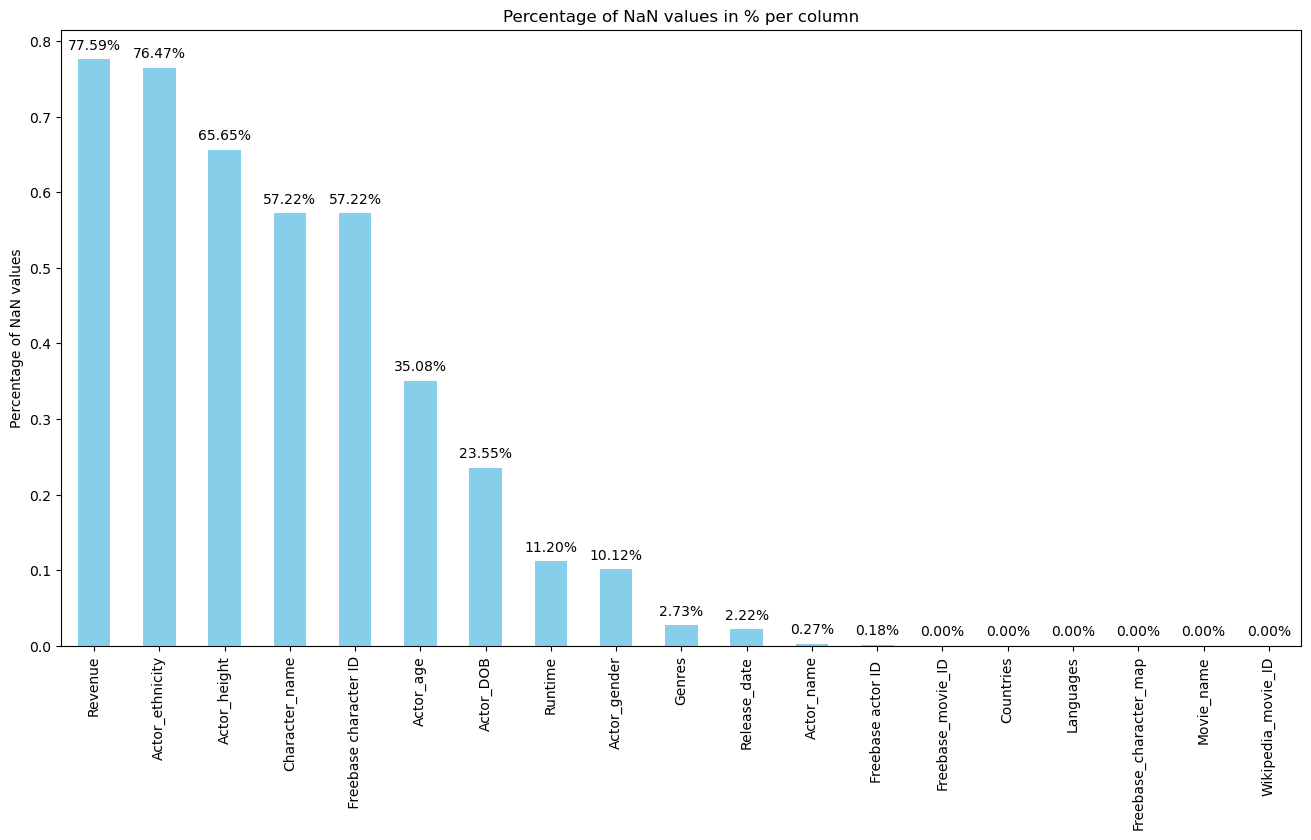

In [26]:
# Calculate the percentage of NaN values per column
nan_percentage = df_popo.isnull().mean().sort_values(ascending=False)

# Plot the percentage of NaN values per column
ax = nan_percentage.plot(kind='bar', figsize=(16, 8), color='skyblue')
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in % per column')

# Annotate each bar with the percentage value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



In [22]:
# Print the percentage of NaN values in % per column
df_popo.isnull().mean().sort_values(ascending=False)

Revenue                   0.775856
Actor_ethnicity           0.764665
Actor_height              0.656464
Character_name            0.572224
 Freebase character ID    0.572202
Actor_age                 0.350845
Actor_DOB                 0.235528
Runtime                   0.111993
Actor_gender              0.101207
Genres                    0.027285
Release_date              0.022179
Actor_name                0.002725
Freebase actor ID         0.001808
Freebase_movie_ID         0.000000
Countries                 0.000000
Languages                 0.000000
Freebase_character_map    0.000000
Movie_name                0.000000
Wikipedia_movie_ID        0.000000
dtype: float64

### Data Visualisation about each feature

In [28]:
# Calculate the summary statistics for each feature
summary = pd.DataFrame({
    'Distinct': df_popo.nunique(),
    'Distinct (%)': df_popo.nunique() / len(df_popo) * 100,
    'Missing': df_popo.isnull().sum(),
    'Missing (%)': df_popo.isnull().mean() * 100,
    'Memory size': df_popo.memory_usage(deep=True)
})

# Function to get the top 10 values and their counts for each feature
def top_10_values(series):
    top_10 = series.value_counts().head(10)
    return ', '.join([f'{index}: {count}' for index, count in top_10.items()])

# Add the top 10 values and their counts to the summary DataFrame
summary['Top 10 Values'] = df_popo.apply(top_10_values)

# Display the summary statistics
summary

,Distinct,Distinct (%),Missing,Missing (%),Memory size,Top 10 Values
Freebase character ID,183419.0,40.700807,257864.0,57.220205,21161290,"/m/0h577m2: 146, /m/0d9kl: 123, /m/0dng4: 80, ..."
Actor_DOB,29494.0,6.544740,106141.0,23.552764,26393483,"1908-05-30: 791, 1964: 349, 1950-06-16: 333, 1..."
Actor_age,155.0,0.034395,158109.0,35.084500,3605216,"31.0: 8983, 30.0: 8935, 28.0: 8929, 29.0: 8821..."
Actor_ethnicity,479.0,0.106290,344598.0,76.466542,18013158,"/m/0dryh9k: 16351, /m/0x67: 10157, /m/041rx: 1..."
Actor_gender,2.0,0.000444,45609.0,10.120670,24951982,"M: 270246, F: 134797"
Actor_height,221.0,0.049040,295837.0,65.646441,3605216,"1.78: 8433, 1.7: 8043, 1.8: 7940, 1.83: 7633, ..."
Actor_name,134077.0,29.751782,1228.0,0.272494,31949897,"Mel Blanc: 791, Mithun Chakraborty: 328, Olive..."
Character_name,126615.0,28.095959,257874.0,57.222424,21404959,"Doctor: 198, Sam: 187, Jack: 185, Mary: 168, A..."
Countries,1868.0,0.414511,0.0,0.000000,34189078,"United States of America: 203788, India: 45601..."
Freebase actor ID,135759.0,30.125019,815.0,0.180849,29901527,"/m/0c5vh: 791, /m/04c636: 328, /m/0lh0c: 299, ..."


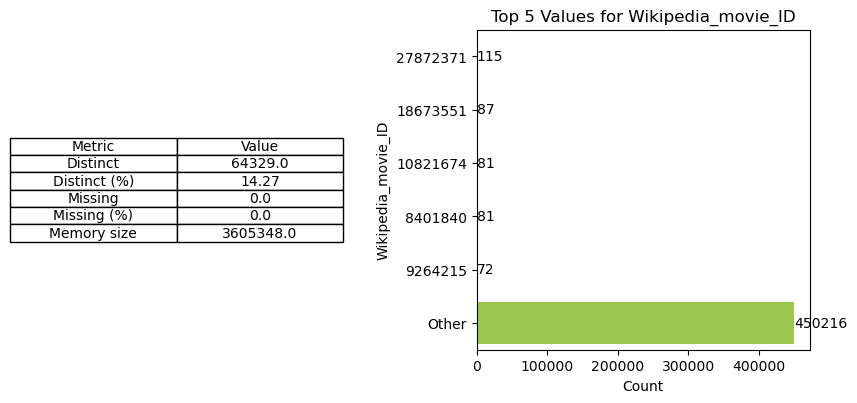

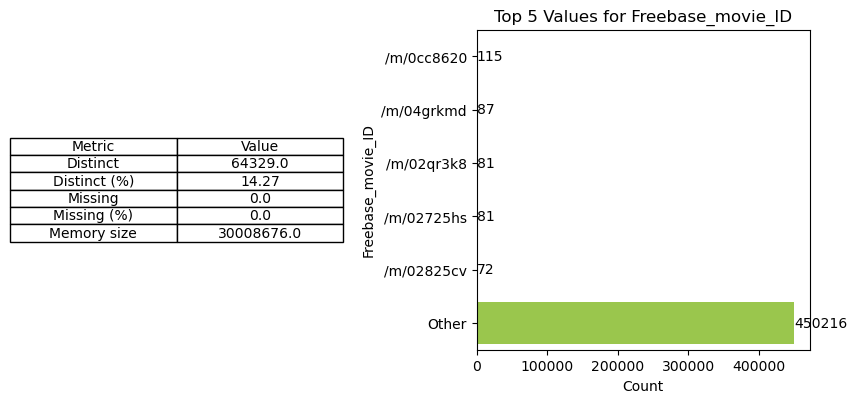

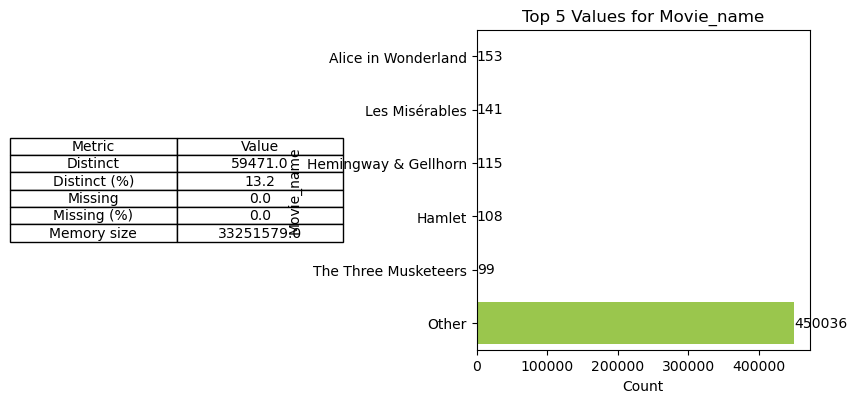

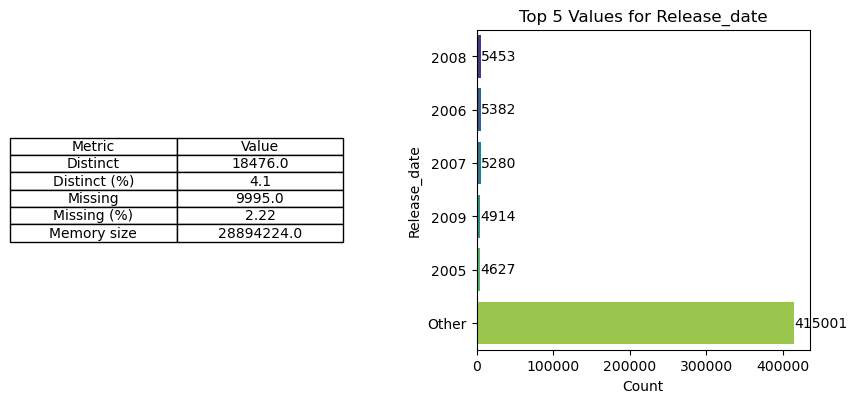

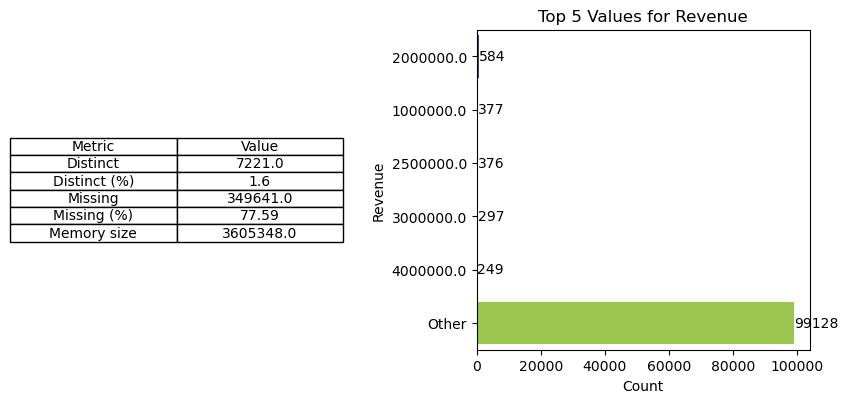

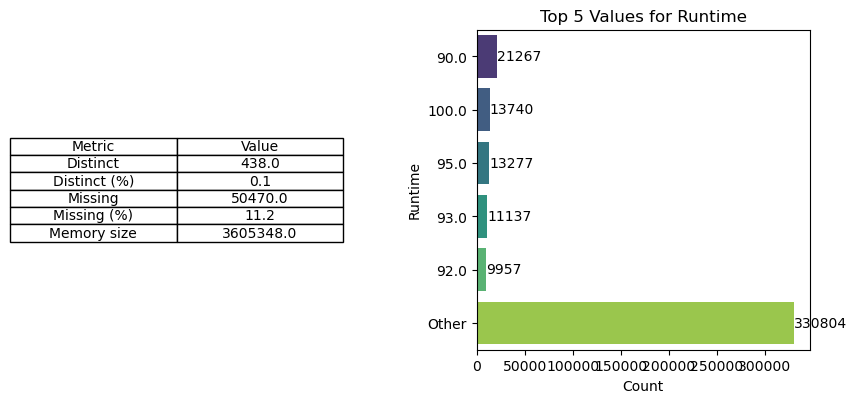

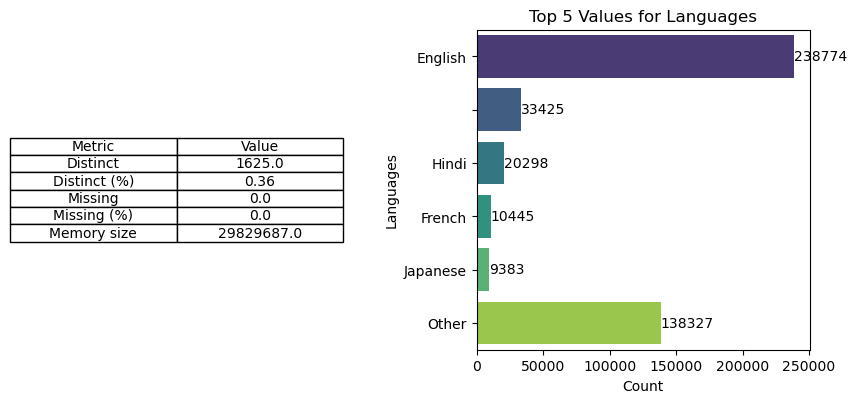

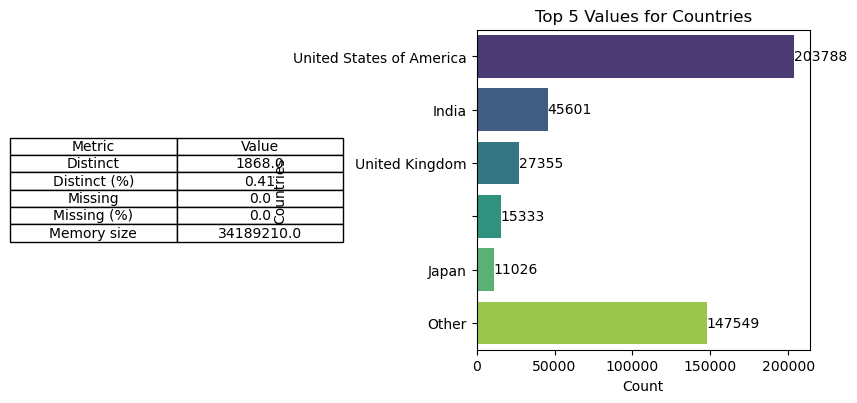

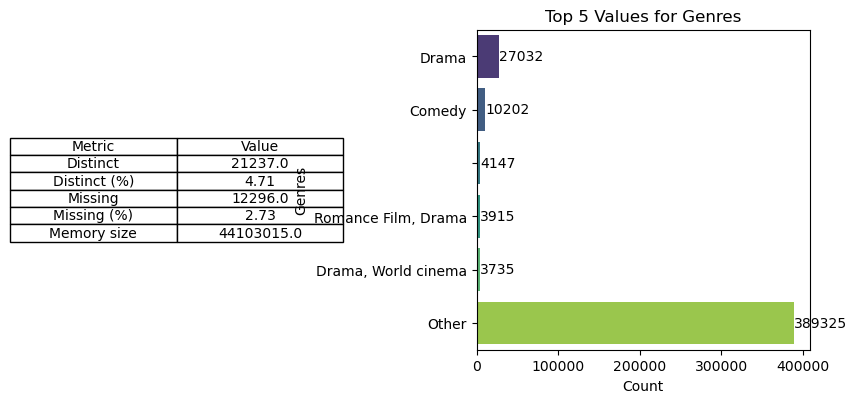

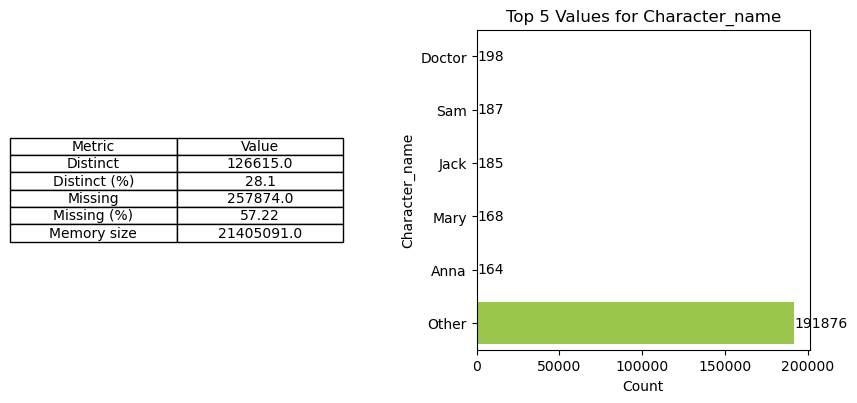

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_summary(df, feature, include_other=False):
    # Calculate the summary statistics for the feature
    summary = pd.DataFrame({
        'Distinct': [df[feature].nunique()],
        'Distinct (%)': [df[feature].nunique() / len(df) * 100],
        'Missing': [df[feature].isnull().sum()],
        'Missing (%)': [df[feature].isnull().mean() * 100],
        'Memory size': [df[feature].memory_usage(deep=True)]
    }).round(2)

    # Get the top 5 values and their counts, excluding NaN values
    top_5 = df[feature].dropna().value_counts().head(5)
    
    if include_other:
        other_count = df[feature].dropna().value_counts().iloc[5:].sum()
        top_5['Other'] = other_count

    # Create a figure with a table on the left and a count plot on the right
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the summary table
    ax[0].axis('tight')
    ax[0].axis('off')
    table_data = summary.T.reset_index()
    table_data.columns = ['Metric', 'Value']
    ax[0].table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')

    # Plot the count plot
    barplot = sns.barplot(x=top_5.values, y=top_5.index, ax=ax[1], hue=top_5.index, palette='viridis', legend=False)
    ax[1].set_title(f'Top 5 Values for {feature}')
    ax[1].set_xlabel('Count')
    ax[1].set_ylabel(feature)

    # Annotate each bar with the count value
    for i in range(len(top_5)):
        ax[1].text(top_5.values[i], i, str(top_5.values[i]), color='black', ha="left", va="center")

    # Adjust the spacing between the subplots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

    plt.show()

In [58]:
def plot_feature_summary(df, feature, include_other=False):
    # Calculate the summary statistics for the feature
    summary = pd.DataFrame({
        'Distinct': [df[feature].nunique()],
        'Distinct (%)': [df[feature].nunique() / len(df) * 100],
        'Missing': [df[feature].isnull().sum()],
        'Missing (%)': [df[feature].isnull().mean() * 100],
        'Memory size': [df[feature].memory_usage(deep=True)]
    }).round(2)

    # Get the top 5 values and their counts, excluding NaN values
    top_5 = df[feature].dropna().value_counts().head(5)
    
    if include_other:
        other_count = df[feature].dropna().value_counts().iloc[5:].sum()
        top_5['Other'] = other_count

    # Create a figure with a table on the left and a count plot on the right
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the summary table
    ax[0].axis('tight')
    ax[0].axis('off')
    table_data = summary.T.reset_index()
    table_data.columns = ['Metric', 'Value']
    ax[0].table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')

    # Plot the count plot
    barplot = sns.barplot(x=top_5.values, y=top_5.index, ax=ax[1], hue=top_5.index, palette='viridis', legend=False)
    ax[1].set_title(f'Top 5 Values for {feature}')
    ax[1].set_xlabel('Count')
    ax[1].set_ylabel(feature)

    # Annotate each bar with the count value
    for i in range(len(top_5)):
        ax[1].text(top_5.values[i], i, str(top_5.values[i]), color='black', ha="left", va="center")

    # Adjust the spacing between the subplots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

    plt.show()

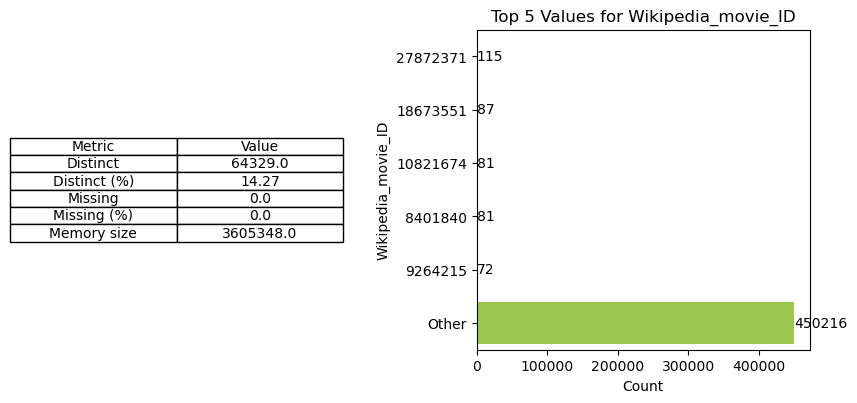

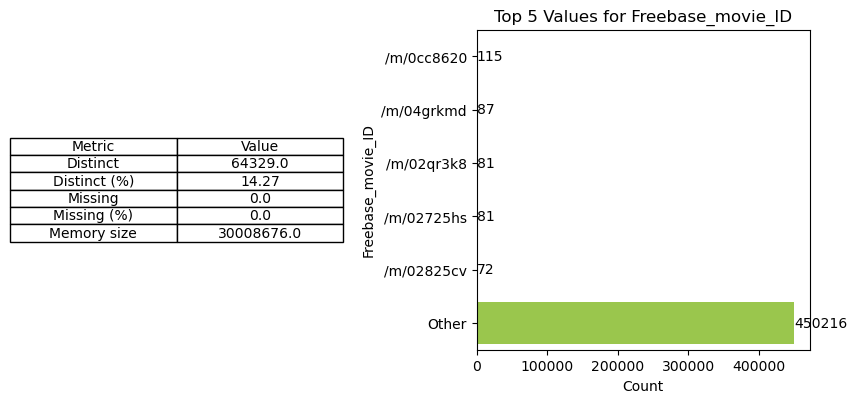

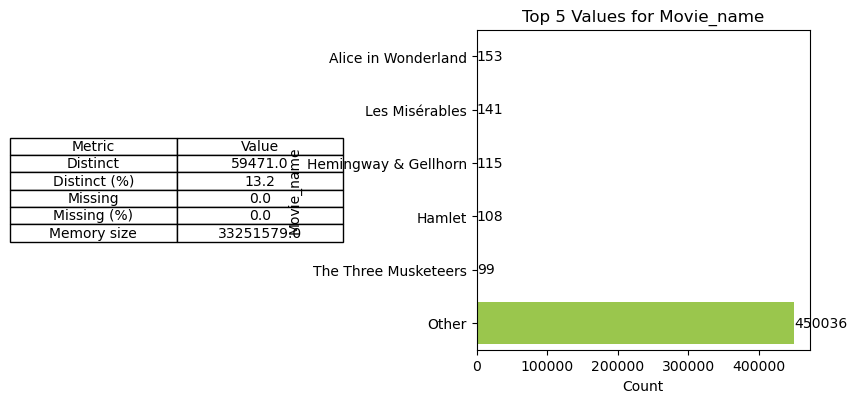

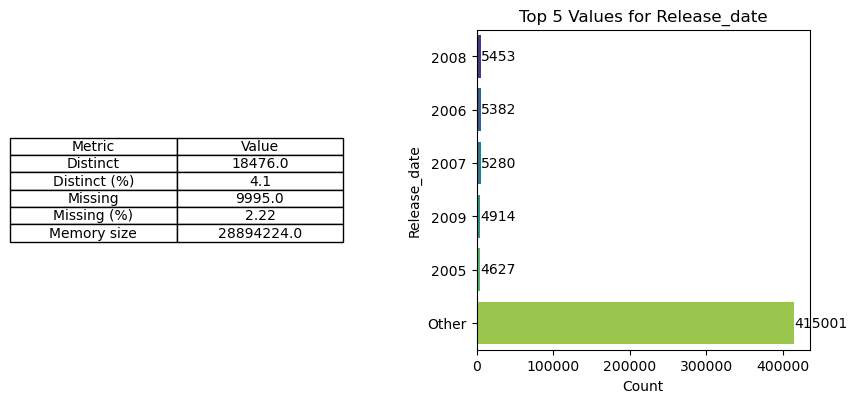

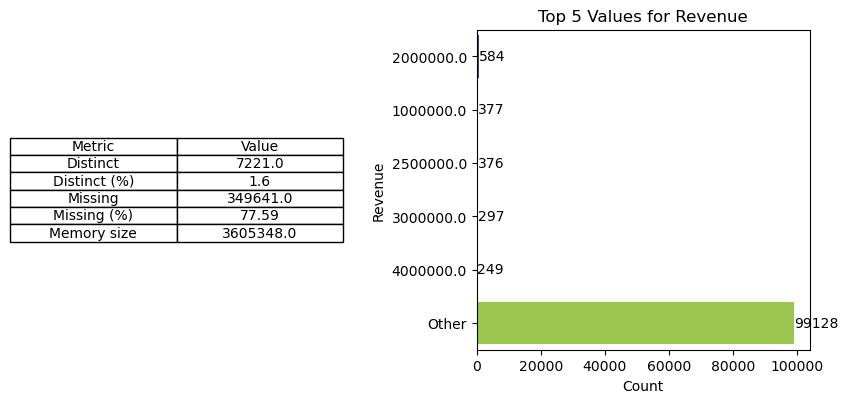

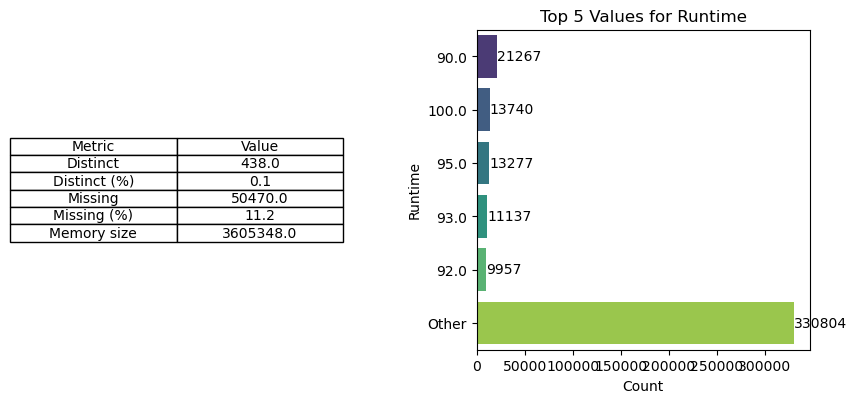

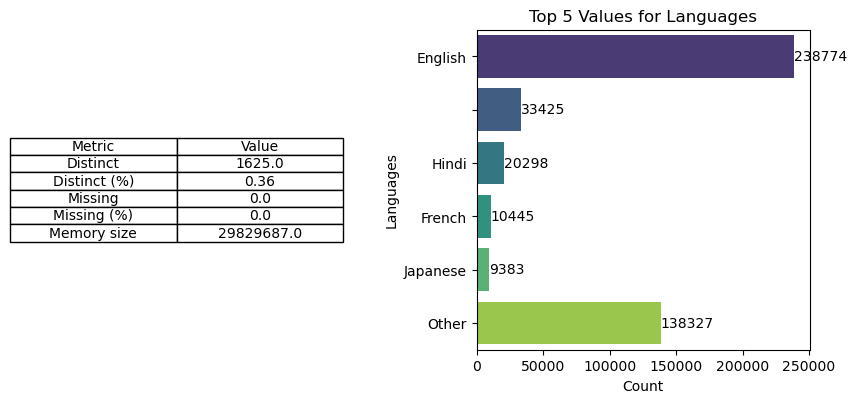

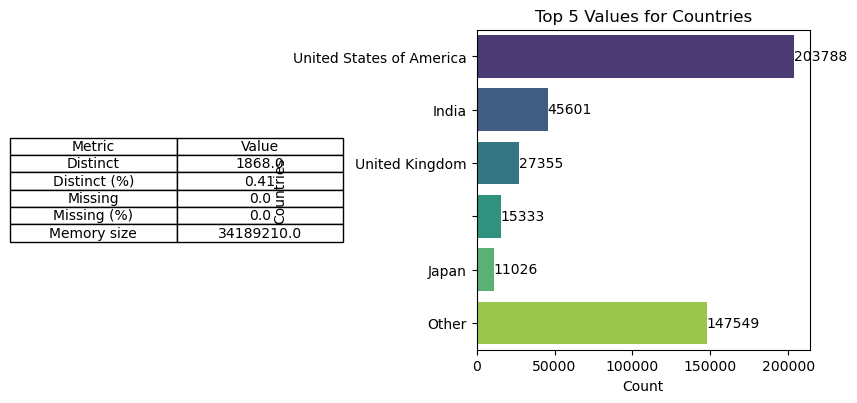

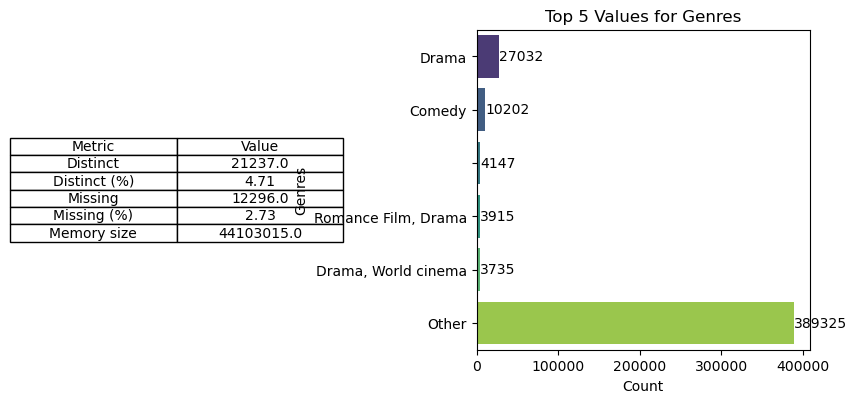

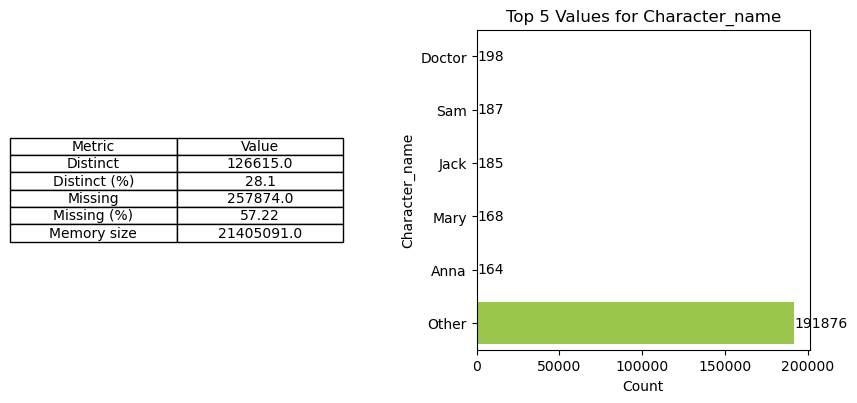

In [60]:
# Apply the function to a limited number of features in the DataFrame
for feature in df_popo.columns[:10]:  # Limiting to the first 5 features
    plot_feature_summary(df_popo, feature, include_other=True)

# Correlation Matrix

Let's first plot a correlation matrix to see how the numerical features are correlated with each other. This will help us identify any strong relationships between features that could be useful for further analysis.

In [66]:
def plot_correlation_matrix_num(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Calculate the correlation matrix, automatically excluding NaN values
    corr_matrix = numeric_df.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
    plt.title('Correlation Matrix')
    plt.show()

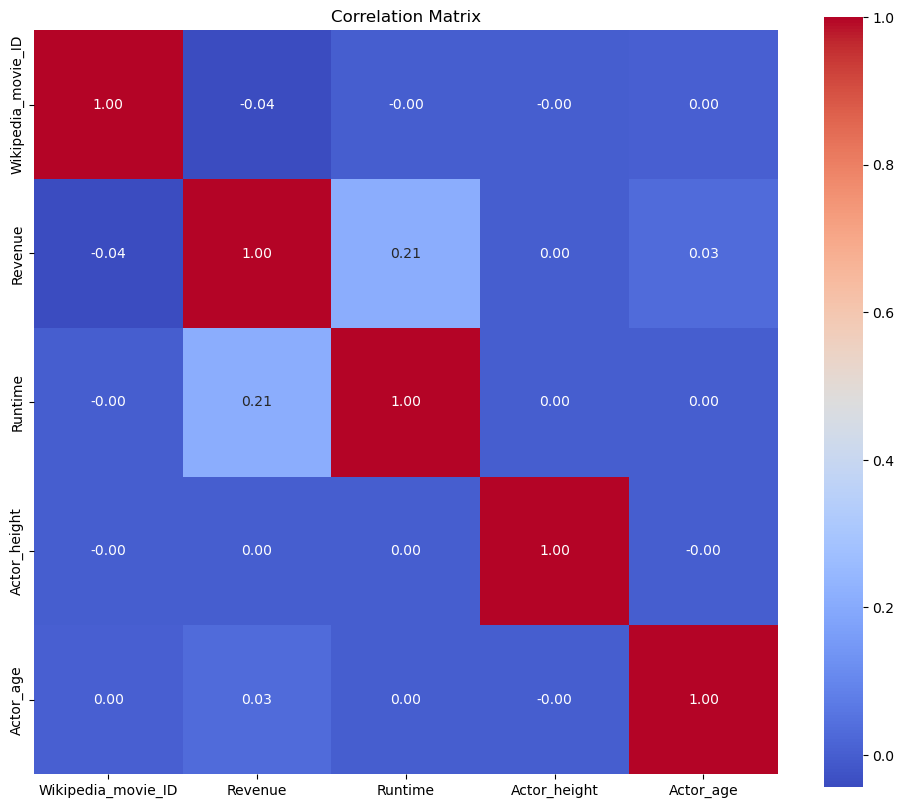

In [67]:
plot_correlation_matrix_num(df_popo)

Then let's encode the categorical features using label encoding and plot the correlation matrix again to see how the encoded features are correlated with each other.

In [79]:
def encode_categorical_features(df):
    # Identify categorical features
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    
    # Initialize a LabelEncoder
    le = LabelEncoder()
    
    # Apply label encoding to each categorical feature
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature].astype(str))
    
    return df

def plot_correlation_matrix(df):
    # Encode categorical features
    df_encoded = encode_categorical_features(df.copy())
    
    # Calculate the correlation matrix, automatically excluding NaN values
    corr_matrix = df_encoded.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
    plt.title('Correlation Matrix')
    plt.show()

Correlations greater than 30%:
                Feature 1               Feature 2  Correlation
0      Wikipedia_movie_ID       Freebase_movie_ID     0.318465
1       Freebase_movie_ID      Wikipedia_movie_ID     0.318465
2            Release_date               Actor_DOB     0.633359
3          Character_name   Freebase character ID     0.642733
4               Actor_DOB            Release_date     0.633359
5               Actor_DOB      Freebase actor ID      0.319457
6  Freebase_character_map      Freebase actor ID      0.319227
7   Freebase character ID          Character_name     0.642733
8      Freebase actor ID                Actor_DOB     0.319457
9      Freebase actor ID   Freebase_character_map     0.319227


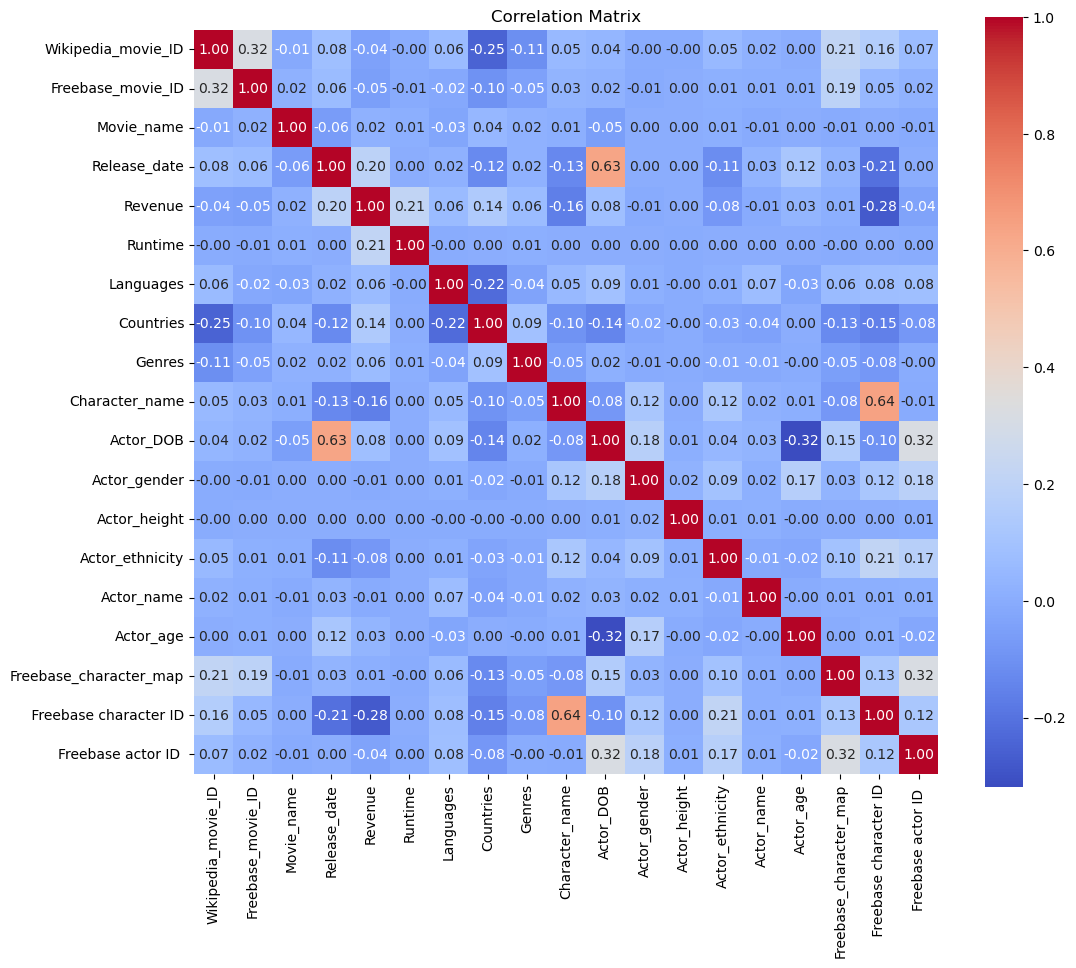

In [80]:
plot_correlation_matrix(df_popo)